# Imports and Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from rl_env.pendulum_env import CustomInvertedPendulum
from agent.utils import SimplePolicyNet
from agent.evolution_strategy import EvolutionStrategy

# 👑 Manually insert the best config from previous grid search
best_config = {
    "sigma": 0.2,
    "alpha": 0.002,
    "n_perturb": 200,
    "hidden_dim": 16,
    "episodes": 10,
    "iterations": 500
}


# Train with Best Config

In [3]:
# Initialize environment and policy using best config
env = CustomInvertedPendulum()
policy = SimplePolicyNet(input_dim=3, hidden_dim=best_config["hidden_dim"], output_dim=1)

# Create ES optimizer
es = EvolutionStrategy(
    policy=policy,
    env=env,
    n_perturb=best_config["n_perturb"],
    sigma=best_config["sigma"],
    alpha=best_config["alpha"],
    episodes=best_config["episodes"]
)

# Train the policy
print("Starting final training run...")
reward_history = es.optimize(best_config["iterations"])


Starting final training run...


<string>:3: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))


# Plot Final Training Curve

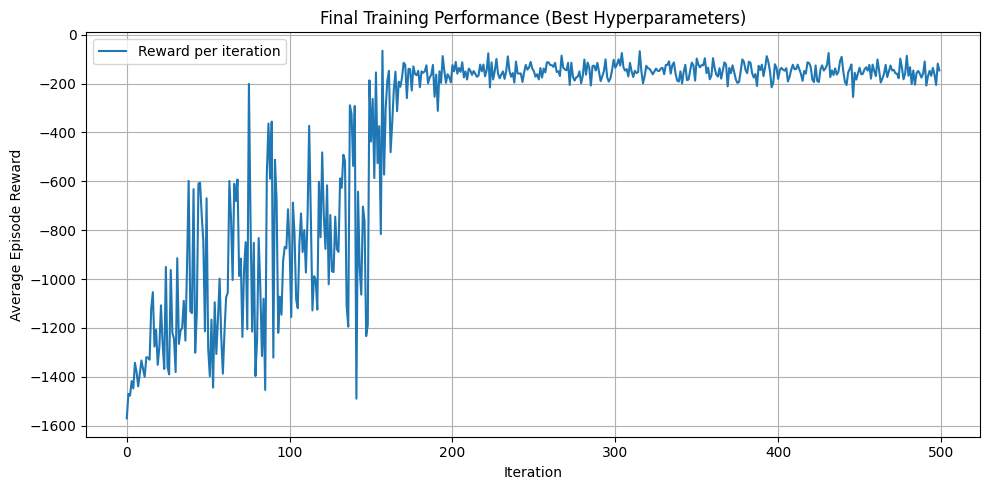

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(reward_history, label="Reward per iteration")
plt.title("Final Training Performance (Best Hyperparameters)")
plt.xlabel("Iteration")
plt.ylabel("Average Episode Reward")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Save Policy

In [5]:
import os
import numpy as np

def save_policy(policy, filename='trained_policy.npy'):
    try:
        # Construct the full file path
        file_path = os.path.join("../models", filename)
        
        # Get the flattened parameters and save them as a NumPy array
        flat_params = policy.get_flat_params()
        np.save(file_path, flat_params)
        print(f"Policy saved as '{file_path}'")
    except Exception as e:
        print(f"Error saving policy: {e}")

save_policy(policy)


Policy saved as '../models\trained_policy.npy'
